In [1]:
from astro import Astro
from tides import Tides

tides = Tides('example_noaa_file.TXT')
sun = Astro(str(tides.latitude), str(tides.longitude), tides.timezone, tides.year, 'Sun')
moon = Astro(str(tides.latitude), str(tides.longitude), tides.timezone, tides.year, 'Moon')

Populating the interactive namespace from numpy and matplotlib


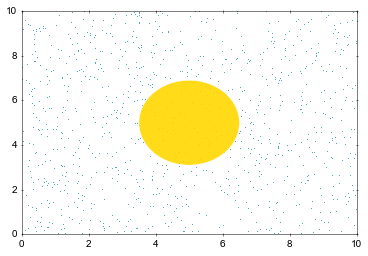

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
%pylab inline

import pandas as pd

import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(111)
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, ',')  # plot some data in data coordinates
ax.set_xlim(0,10)

circ = patches.Ellipse(xy = (5., 5.), width = 3., height = 3.8, angle = 0, transform = ax.transData,
                      facecolor = 'gold', edgecolor = 'white', alpha = 0.9, zorder = 100)
ax.add_patch(circ)

plt.show()


In [5]:
def _plot_a_date(date):
    '''
    Plots the two daily subplots for `date` in gridspec coordinates
    gs[gridx, gridy] for the sun/moon and gs[gridx, gridy + 1] for tide.
    `date` must be in a form pandas recognizes for datetime slicing.
    i.e. '2015-07-18'
    '''
    gs = gridspec.GridSpec(2, 1, wspace = 0.0, hspace = 0.0)
    
    day_of_tide = tides.all_tides[date]
    day_of_moon = moon.altitudes[date]
    day_of_sun = sun.altitudes[date]
    time_zone = tides.timezone
    
    # convert indices to matplotlib-friendly datetime format
    Si = day_of_sun.index.to_pydatetime()
    Mi = day_of_moon.index.to_pydatetime()
    Ti = day_of_tide.index.to_pydatetime()
    
    # zeros for plotting the filled area under each curve
    Sz = np.zeros(len(Si))
    Mz = np.zeros(len(Mi))
    Tz = np.zeros(len(Ti))
    
    # x-limits from midnight to 11:59pm local time, x-ticks at 6am/noon/6pm
    start_time = pd.to_datetime(date + ' 00:00').tz_localize(time_zone)
    start_time = matplotlib.dates.date2num(start_time.to_pydatetime())
    stop_time = pd.to_datetime(date + ' 23:59').tz_localize(time_zone)
    stop_time = matplotlib.dates.date2num(stop_time.to_pydatetime())
    
    # sun and moon heights on top
    ax1 = plt.subplot(gs[0])
    ax1.fill_between(Si, np.sin(day_of_sun), Sz, color = '#FFEB00', alpha = 0.3)
    ax1.fill_between(Si, day_of_sun / (np.pi / 2), Sz, color = '#FFEB00', alpha = 1)
    ax1.fill_between(Mi, np.sin(day_of_moon), Mz, color = '#D7A8A8', alpha = 0.1)
    ax1.fill_between(Mi, day_of_moon / (np.pi / 2), Mz, color = '#D7A8A8', alpha = 0.1)
    ax1.set_xlim((start_time, stop_time))
    ax1.set_ylim((0, 1))
    ax1.set_xticks([])
    ax1.set_yticks([])
    for axis in ['top','left','right']:
        ax1.spines[axis].set_linewidth(1.5)
    ax1.spines['bottom'].set_visible(False)
    plt.text(0.02, 0.85, day_of_sun.index[0].day, ha='left', fontsize=14, fontname='Foglihten',
            transform = ax1.transAxes)
    moon_icon1 = '0ABCDEFGHIJKLM@NOPQRSTUVWXYZ'  # the dark part
    plt.text(0.93, 0.69, moon_icon1[moon.phase_day_num[date]], ha = 'right', fontsize = 24, color = '0.7',
             fontname = 'moon phases', transform = ax1.transAxes)
    plt.text(0.93, 0.69, '*', ha = 'right', fontsize = 24, color = '#D7A8A8',
             alpha = 0.3, fontname = 'moon phases', transform = ax1.transAxes)

    # tide magnitudes below
    ax2 = plt.subplot(gs[1])
    ax2.fill_between(Ti, day_of_tide, Tz, color='#52ABB7', alpha=0.8)
    ax2.set_xlim((start_time, stop_time))
    ax2.set_ylim((tides.annual_min, tides.annual_max))
    ax2.set_xticks([])
    ax2.set_yticks([])
    for axis in ['bottom','left','right']:
        ax2.spines[axis].set_linewidth(1.5)
    ax2.spines['top'].set_linewidth(0.5)
    
    return ax1


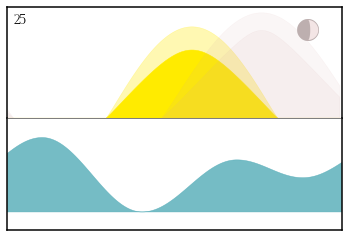

In [6]:
ax = _plot_a_date('2015-03-25')

plt.savefig('testtt.pdf')
plt.show()

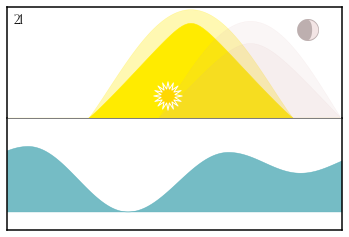

In [7]:
ax = _plot_a_date('2015-06-21')

xloc = pd.to_datetime('2015-06-21 18:30').to_pydatetime() #need to fix this, as with time index

ax.scatter(xloc, 0.2, s=800, marker = (16, 1, 0), facecolor = 'gold', linewidth = 1, edgecolor = 'white',
        zorder = 100)
#ax.plot(xloc, 0.2, marker = (8, 1, 0), color = 'white', alpha = 0.8, zorder = 90, markersize=30)

plt.show()


In [26]:
i = '2015-09'
monthnum = pd.to_datetime(i).month
if monthnum in sun.events.index.month:
    print('yes')
else: print('no')

yes


In [44]:
solev = sun.events[monthnum == sun.events.index.month]

In [45]:
solev == 'fall equinox'

2015-09-23 01:20:26.656868-07:00    True
dtype: bool

In [47]:
solev.index[0].day - 1

22

In [38]:
sun_icon_col = {
        'spring equinox':   '#C8E097',
        'summer solstice':  'gold',
        'fall equinox':     '#D56F28',
        'winter solstice':  '#B4EAF4'
    }
sun_icon_col[solev[0]]

'#D56F28'